<a href="https://colab.research.google.com/github/raviintechis/Ravi_Paris-House-Prediction/blob/main/Ravi_Paris_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [2]:
df = pd.read_csv('ParisHousing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
df.shape

(10000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [6]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


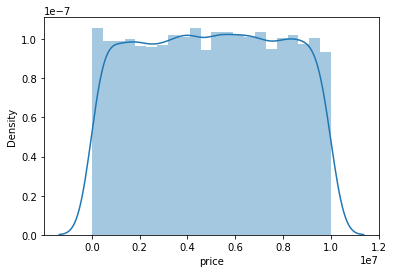

In [8]:
sns.distplot(df['price']);

In [23]:
df.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [30]:
reg = RandomForestRegressor()

In [31]:
X = df
y = X.pop('price')

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
reg.score(X_train,y_train)

0.9999997437341646

In [35]:
def evaluate(model, X, y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [36]:
evaluate(reg,X_train,y_train)

Model Performance
Average Error: 1158.2803 degrees.
Accuracy = 99.92%.


99.917525614478

In [37]:
import xgboost
from xgboost import XGBRegressor
# from sklearn.ensemble import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as MSE
scaler = MinMaxScaler()
model = XGBRegressor(objective ='reg:squarederror',
                     n_estimators = 42,
                   learning_rate = 0.2,
                   max_depth = 5,
                   subsample =  .6)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("VAL SCORE:",pipe.score(X_test, y_test))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %MSE(y_test, pred))
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

VAL SCORE: 0.9999622788139747
Training SCORE: 0.999970547636359
MSE :  303330163.714895
RMSE :  17416.376308
